In [232]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import io
from scipy import misc
import pydotplus
import collections
from sklearn import tree
from sklearn.tree import export_graphviz

<b>1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.</b>
    1. Title: Balance Scale Weight & Distance Database
    2. Relevant Information: This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight).  If they are equal, it is balanced.
    3. Number of Instances: 625 (49 balanced, 288 left, 288 right)

    4. Number of Attributes: 4 (numeric) + class name = 5

    5. Attribute Information:
        1. Class Name: 3 (L, B, R)
        2. Left-Weight: 5 (1, 2, 3, 4, 5)
        3. Left-Distance: 5 (1, 2, 3, 4, 5)
        4. Right-Weight: 5 (1, 2, 3, 4, 5)
        5. Right-Distance: 5 (1, 2, 3, 4, 5)

    6. Missing Attribute Values: none

    7. Class Distribution: 
       1. 46.08 percent are L
       2. 07.84 percent are B
       3. 46.08 percent are R

    


<b> 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.</b>
> Missing Attribute Values: none
> <br> It has 5 features where 4 are numeric and one is categorical. 
><br> Attribute Information:
        1. Class Name: 3 (L, B, R)
        2. Left-Weight: 5 (1, 2, 3, 4, 5)
        3. Left-Distance: 5 (1, 2, 3, 4, 5)
        4. Right-Weight: 5 (1, 2, 3, 4, 5)
        5. Right-Distance: 5 (1, 2, 3, 4, 5)

In [236]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           names = ["Class Name", "Left-Weight", "Left-Distance", "Right-Weight", "Right-Distance"], sep= ',', header= None)

In [237]:
balance_data.describe(include="all")

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,L,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


In [238]:
balance_data["Class Name"] =  balance_data["Class Name"].astype('category')

In [239]:
balance_data.dtypes

Class Name        category
Left-Weight          int64
Left-Distance        int64
Right-Weight         int64
Right-Distance       int64
dtype: object

In [240]:
balance_data.shape

(625, 5)

In [241]:
len(balance_data)

625

In [242]:
balance_data.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [243]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [234]:
balance_data["Class Name"].value_counts()

R    288
L    288
B     49
Name: Class Name, dtype: int64

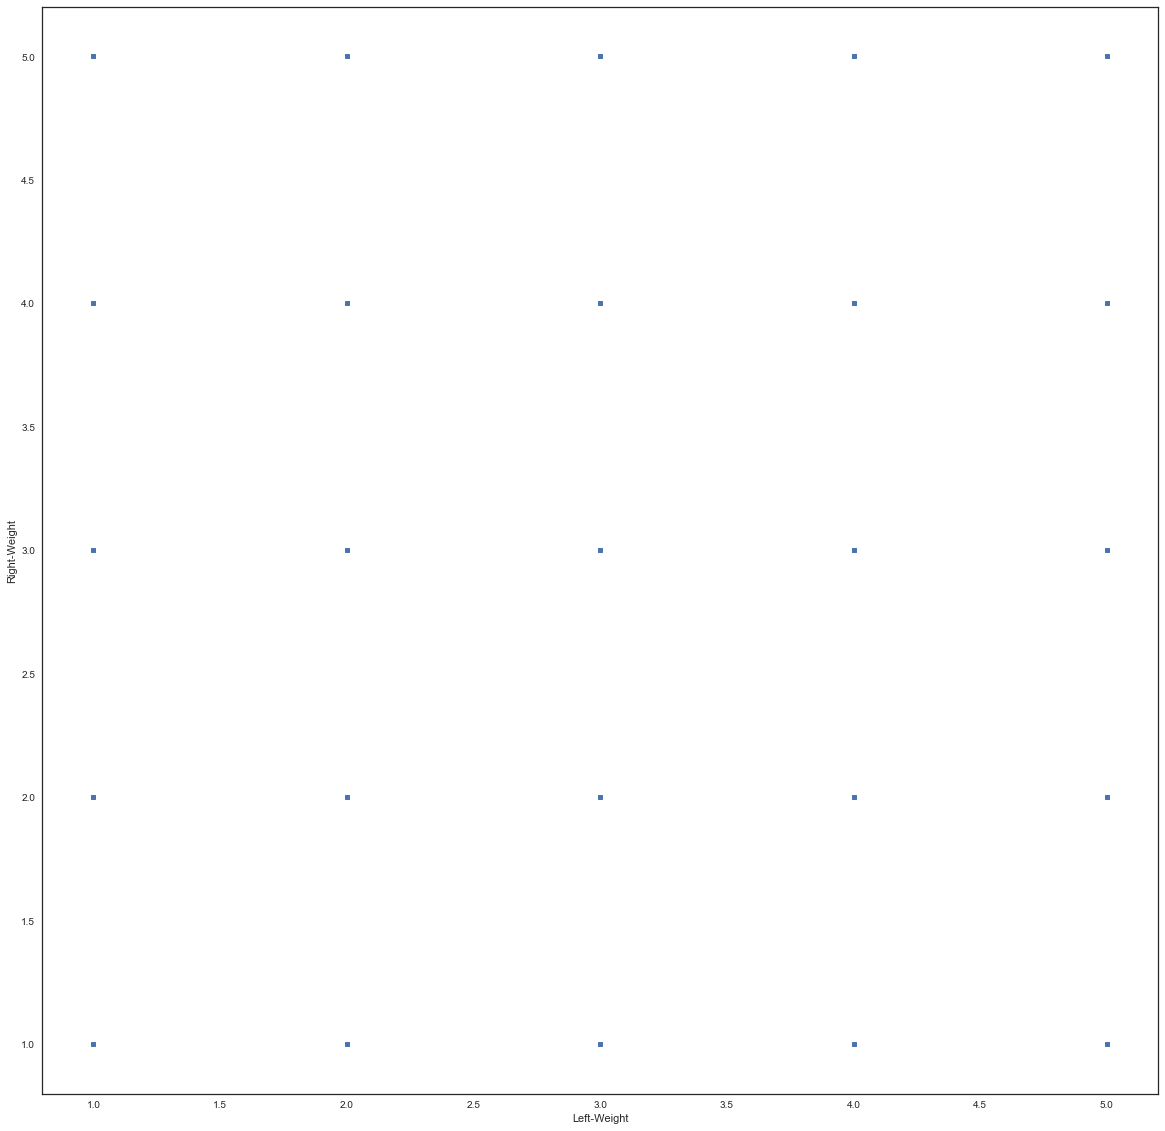

In [235]:
balance_data.plot(kind="scatter", x="Left-Weight", y="Right-Weight")

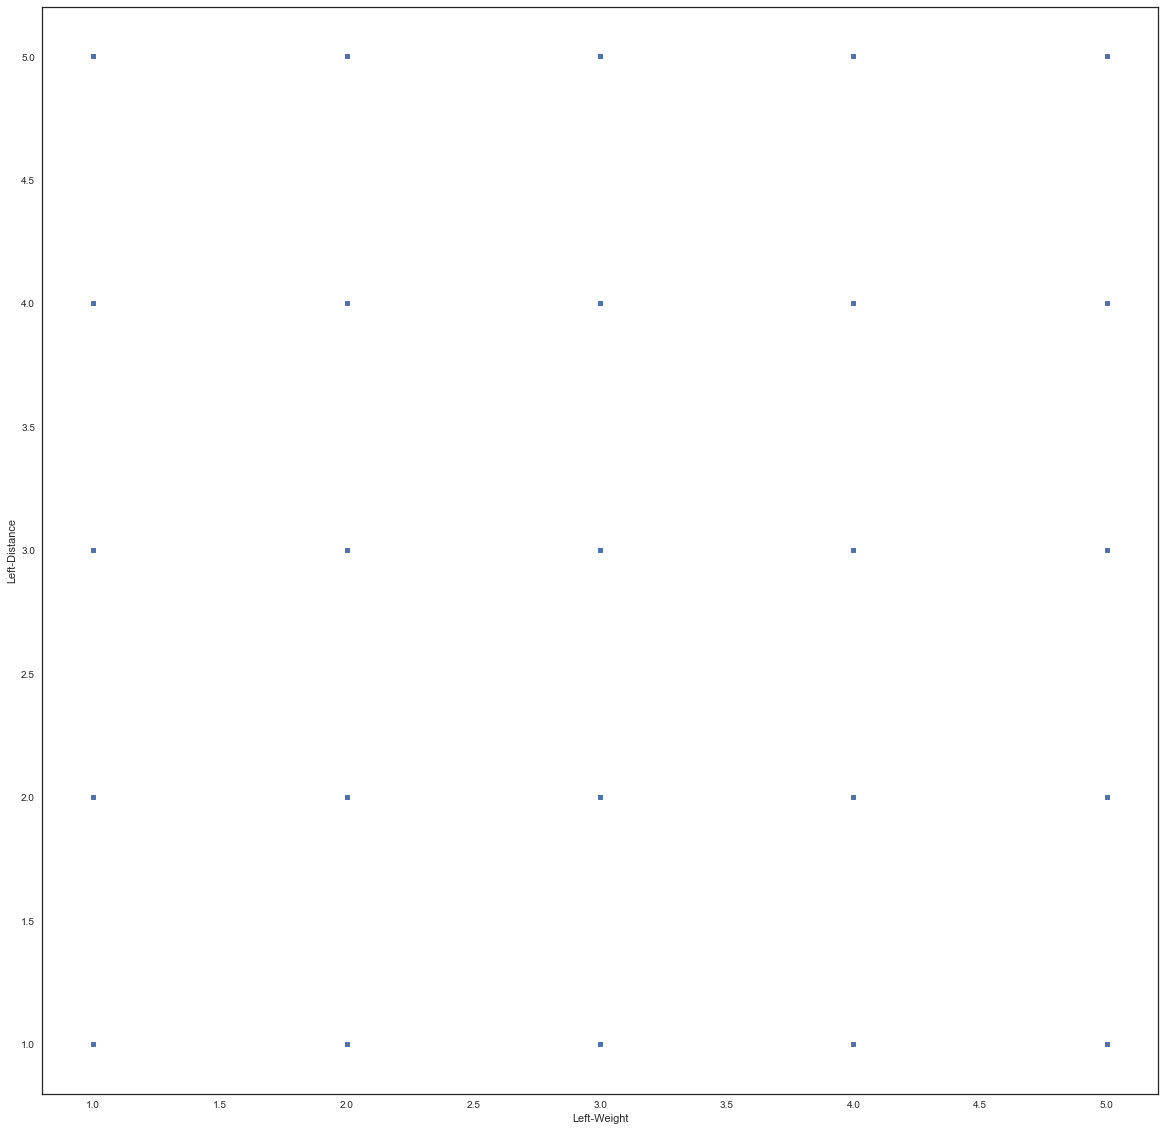

In [244]:
balance_data.plot(kind="scatter", x="Left-Weight", y="Left-Distance")

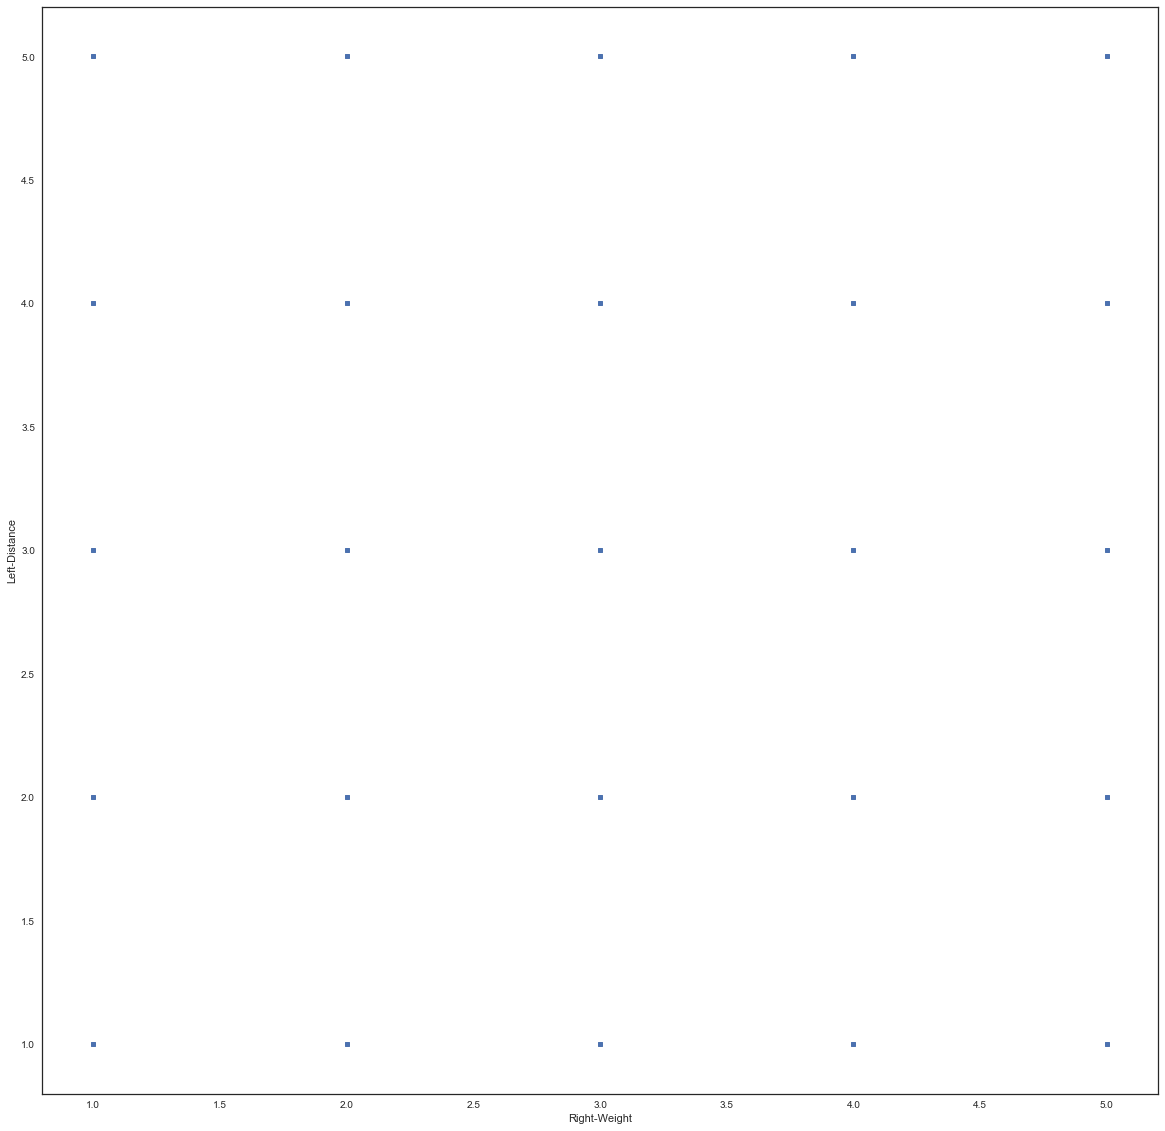

In [245]:
balance_data.plot(kind="scatter", x="Right-Weight", y="Left-Distance")

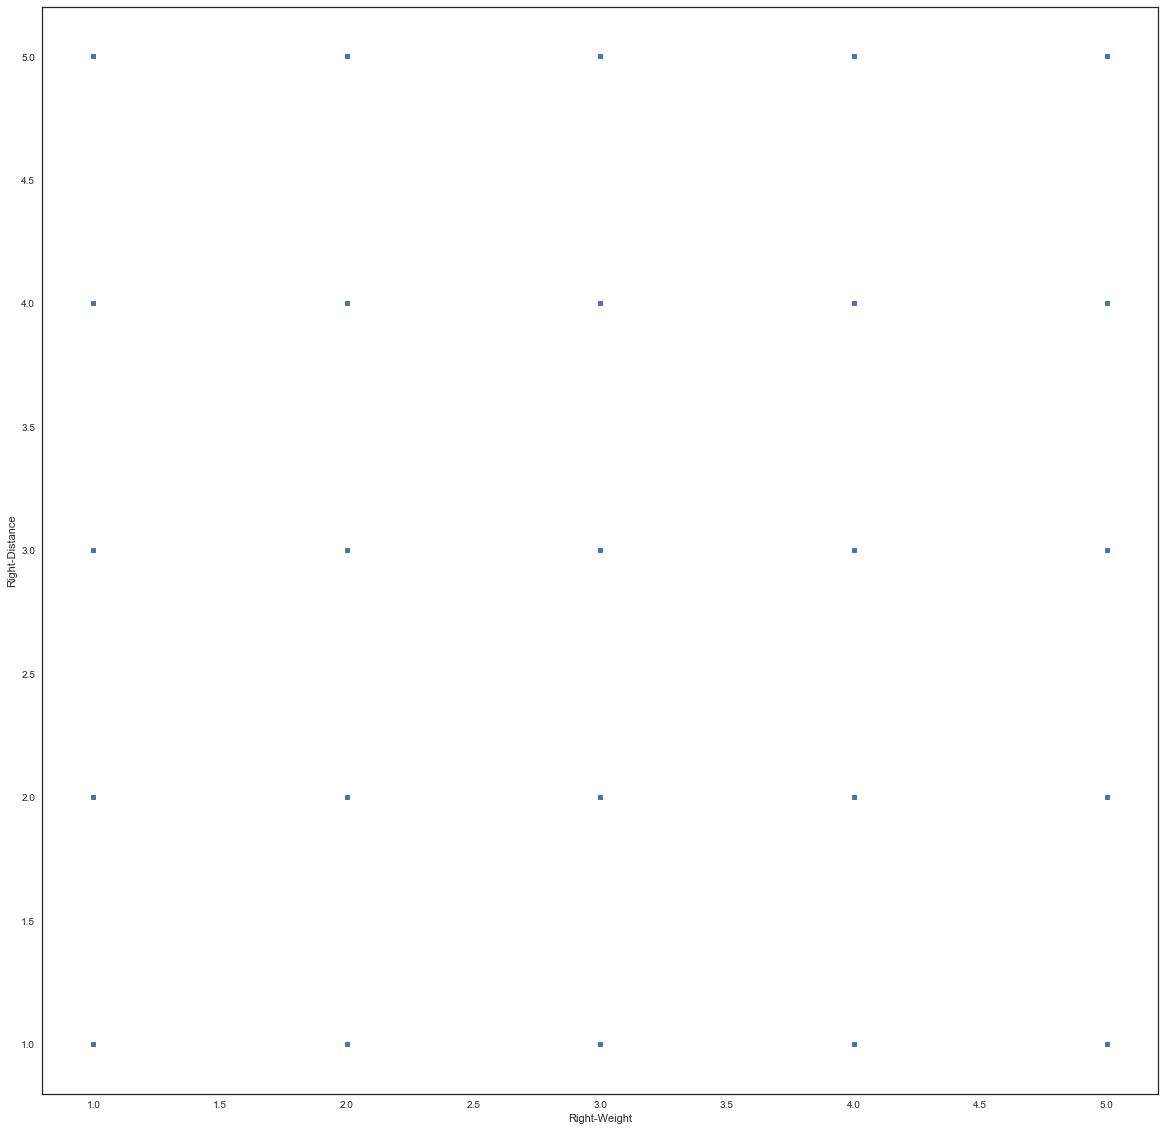

In [246]:
balance_data.plot(kind="scatter", x="Right-Weight", y="Right-Distance")

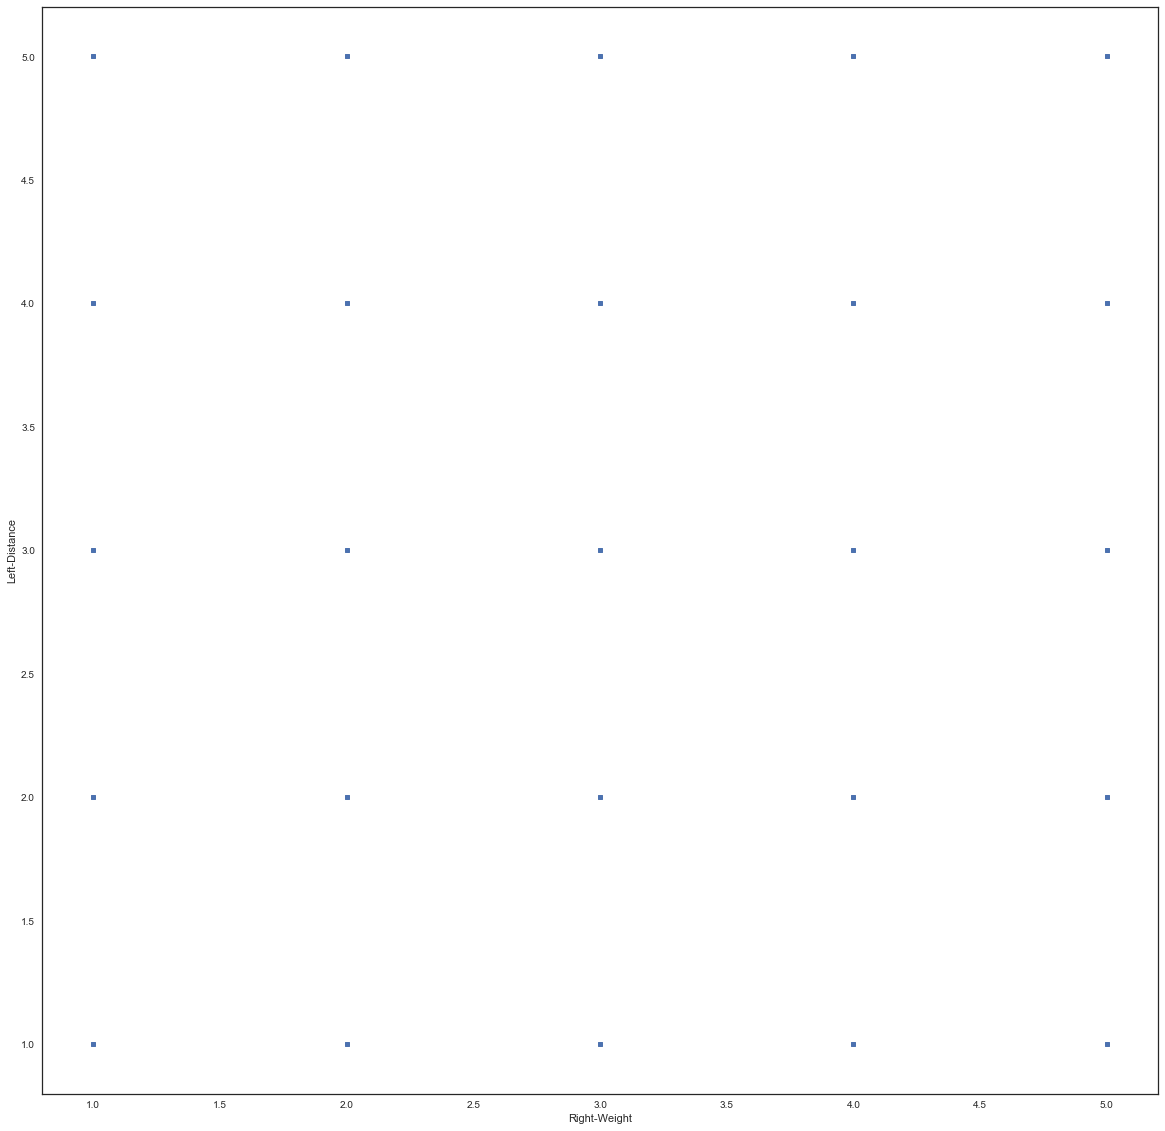

In [247]:
balance_data.plot(kind="scatter", x="Right-Weight", y="Left-Distance")

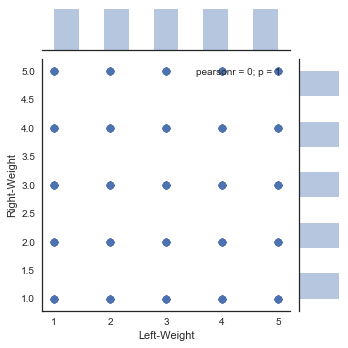

In [248]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Left-Weight", y="Right-Weight", data=balance_data, size=5)

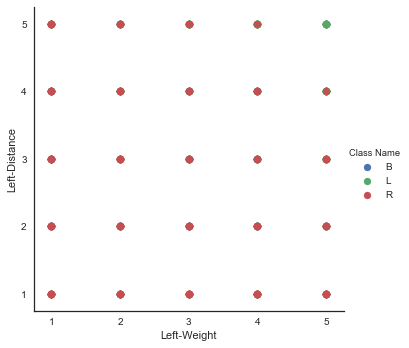

In [250]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(balance_data, hue="Class Name", size=5) \
   .map(plt.scatter, "Left-Weight", "Left-Distance") \
   .add_legend()

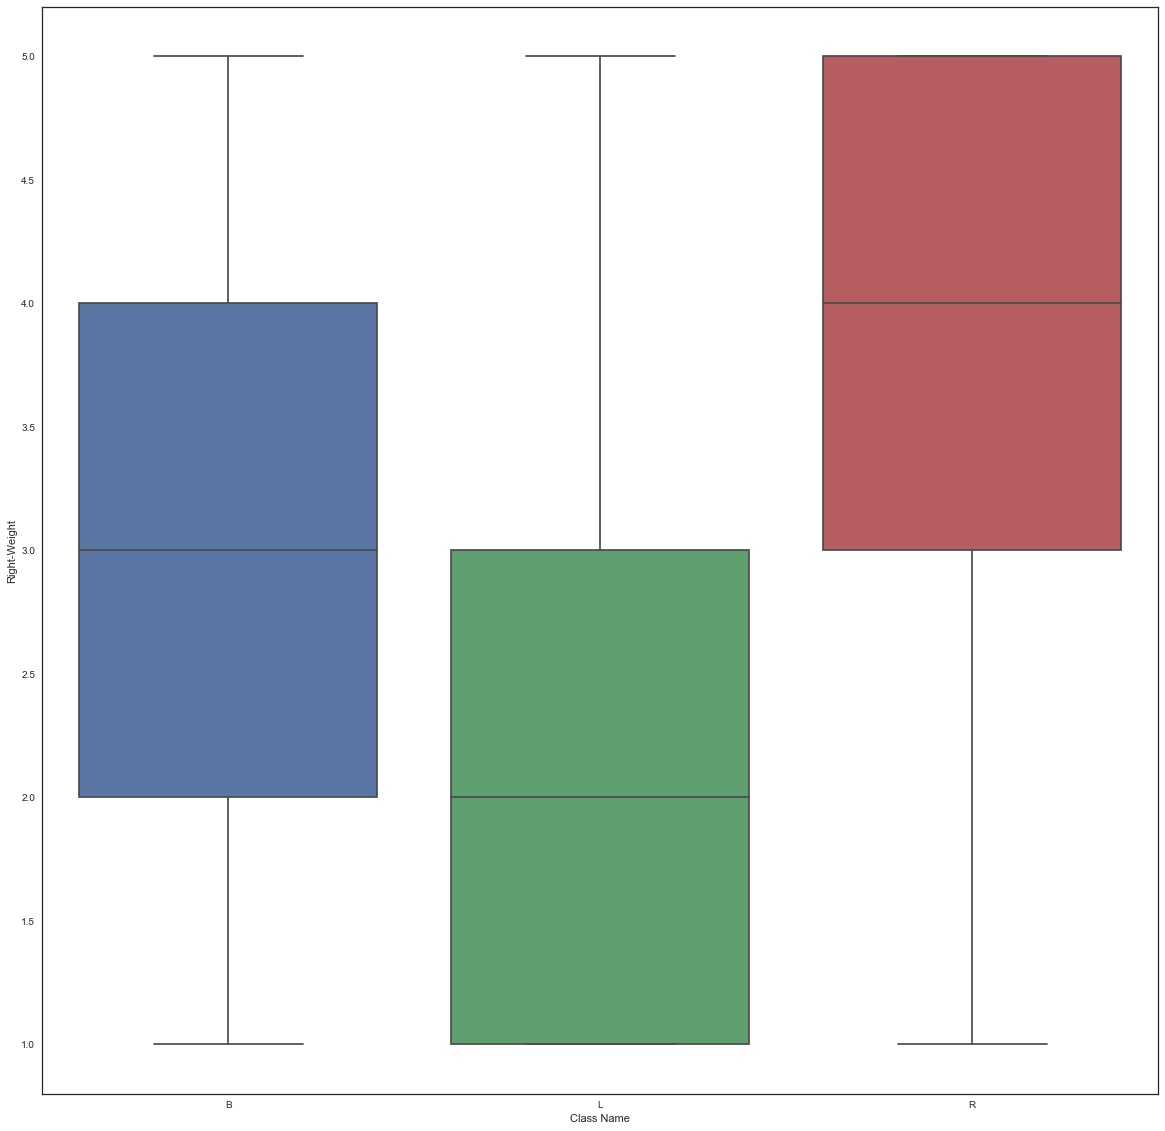

In [251]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Class Name", y="Right-Weight", data=balance_data)

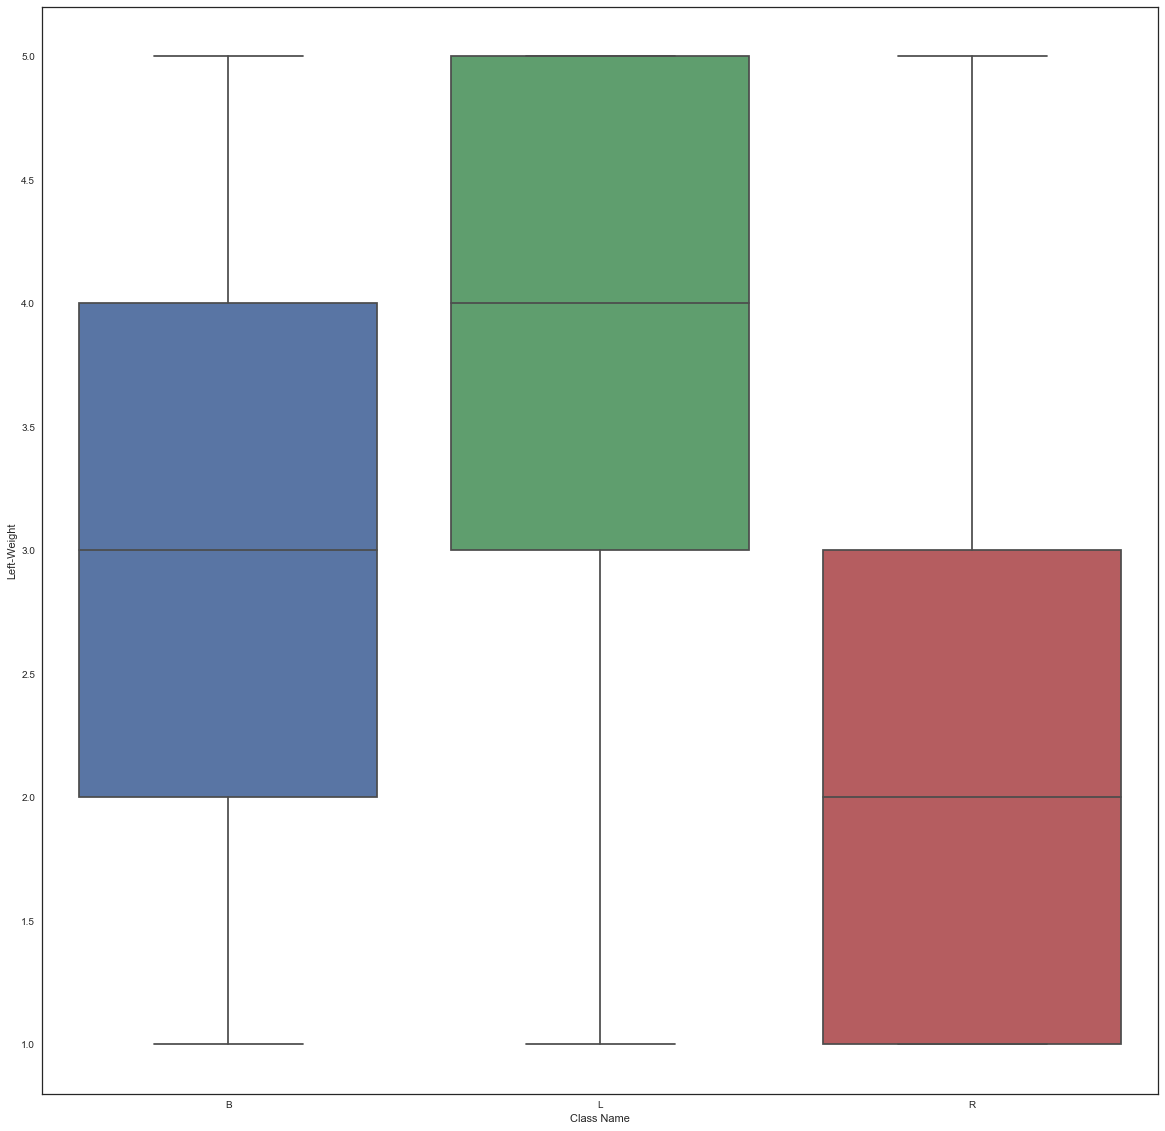

In [252]:
sns.boxplot(x="Class Name", y="Left-Weight", data=balance_data)

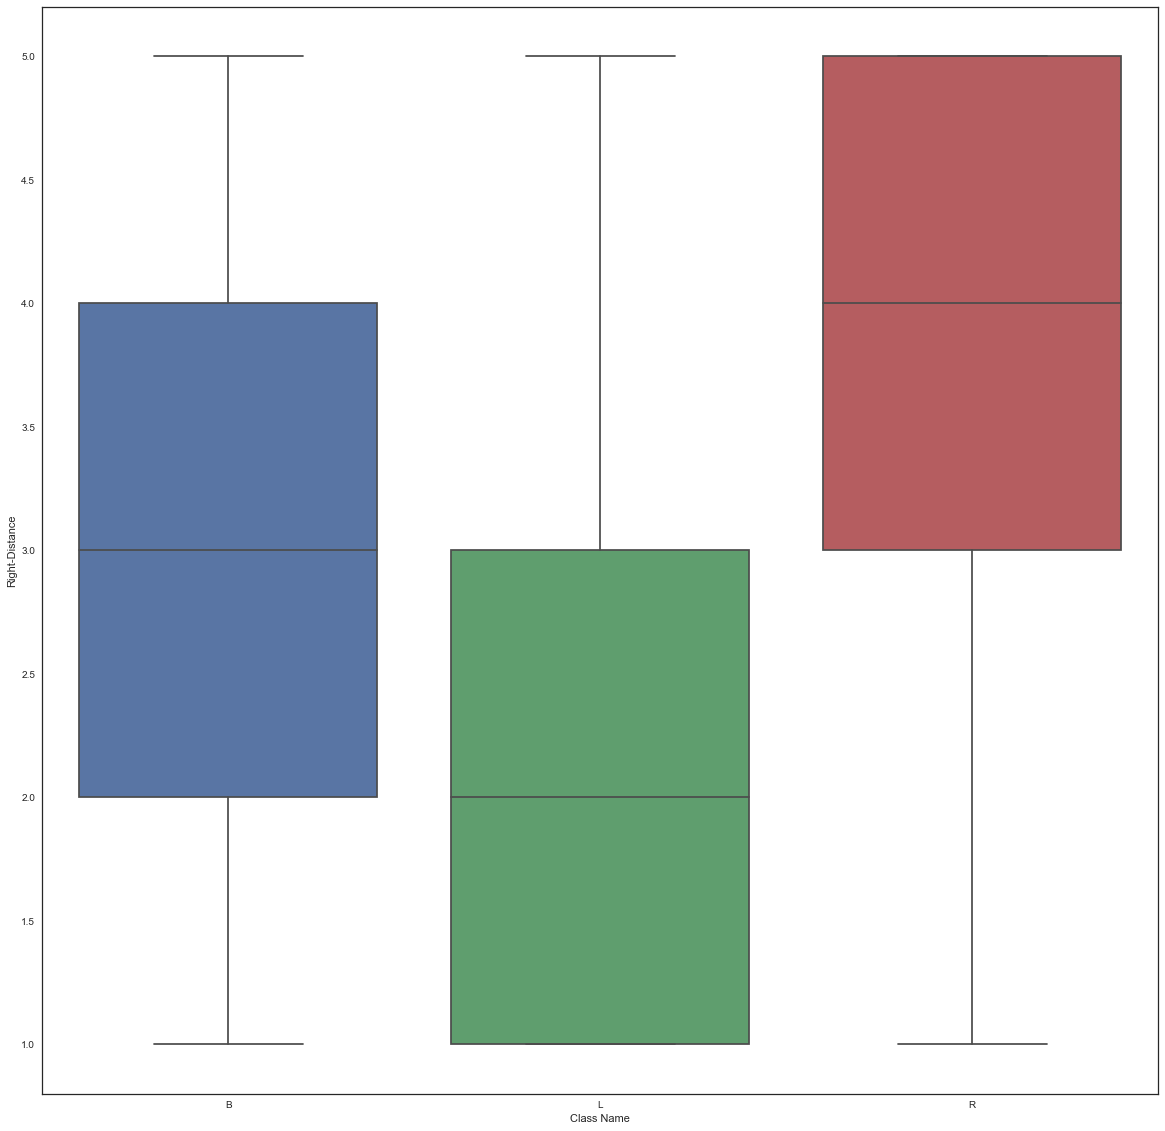

In [253]:
sns.boxplot(x="Class Name", y="Right-Distance", data=balance_data)

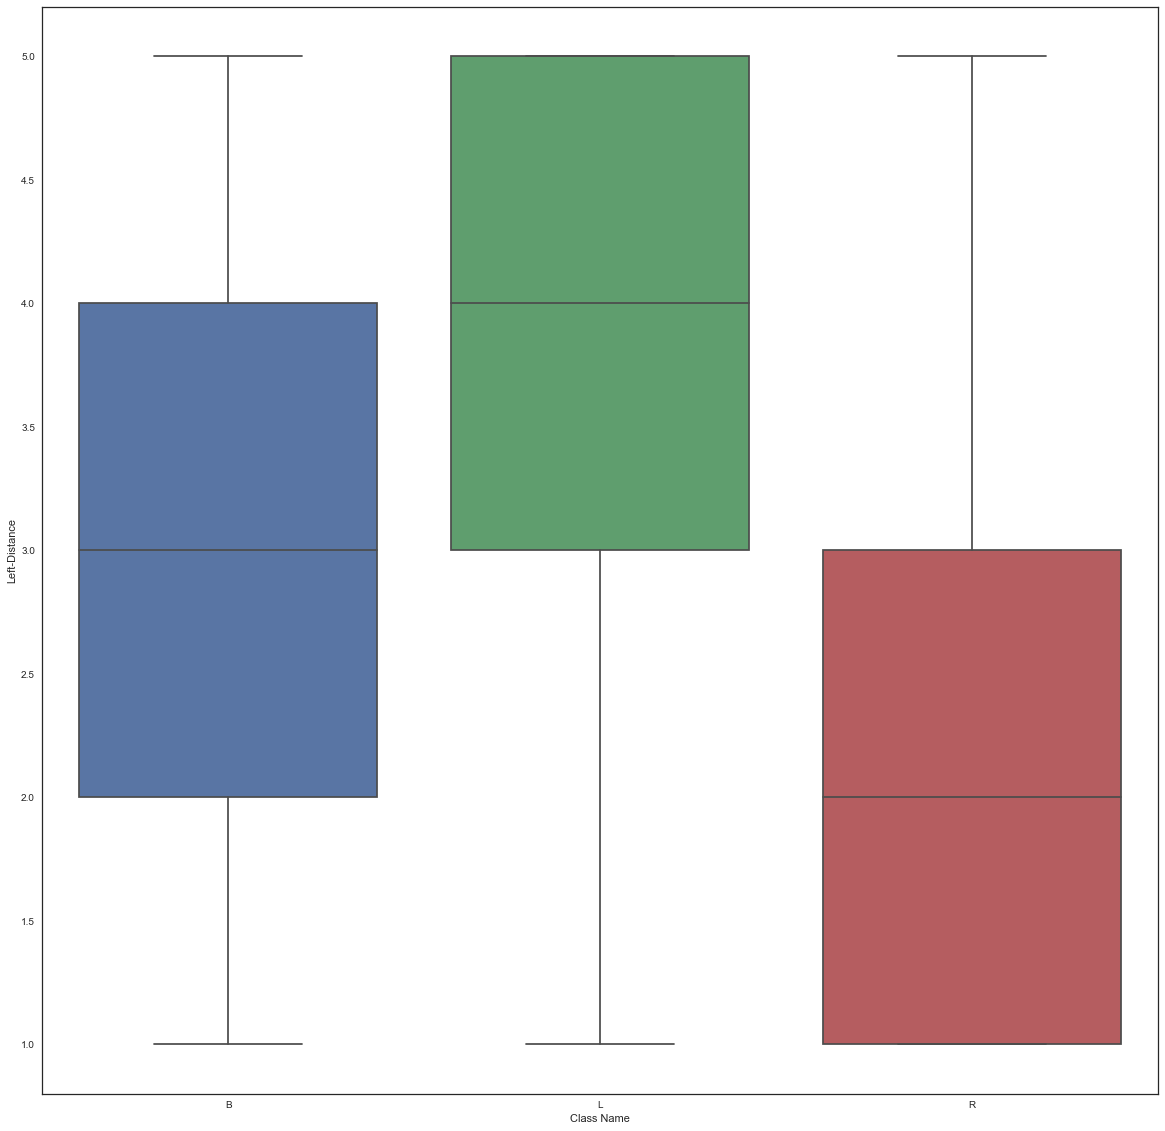

In [254]:
sns.boxplot(x="Class Name", y="Left-Distance", data=balance_data)

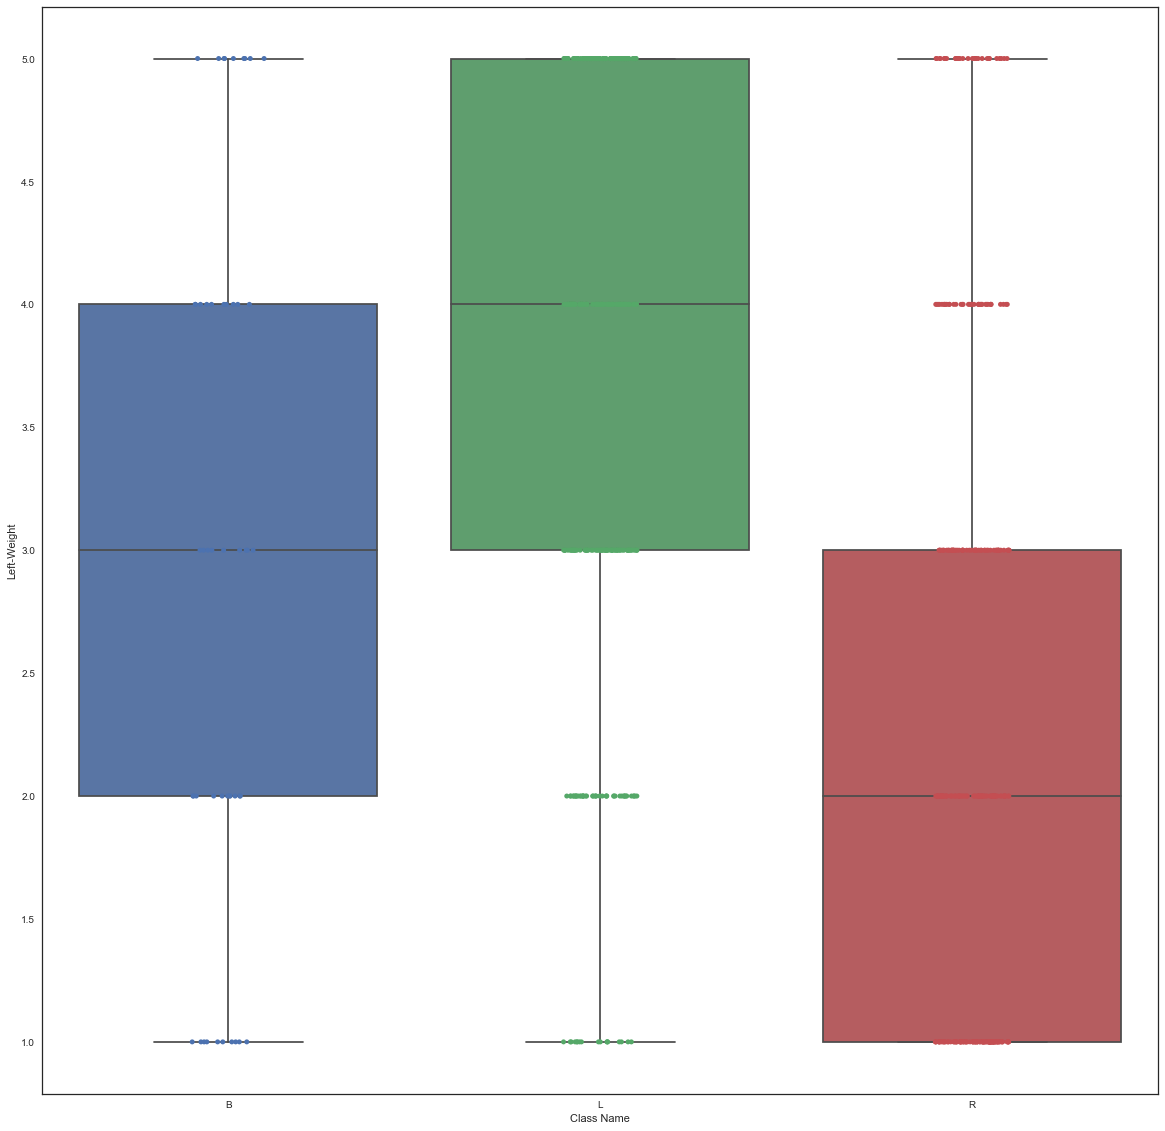

In [255]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Class Name", y="Left-Weight", data=balance_data)
ax = sns.stripplot(x="Class Name", y="Left-Weight", data=balance_data, jitter=True, edgecolor="gray")

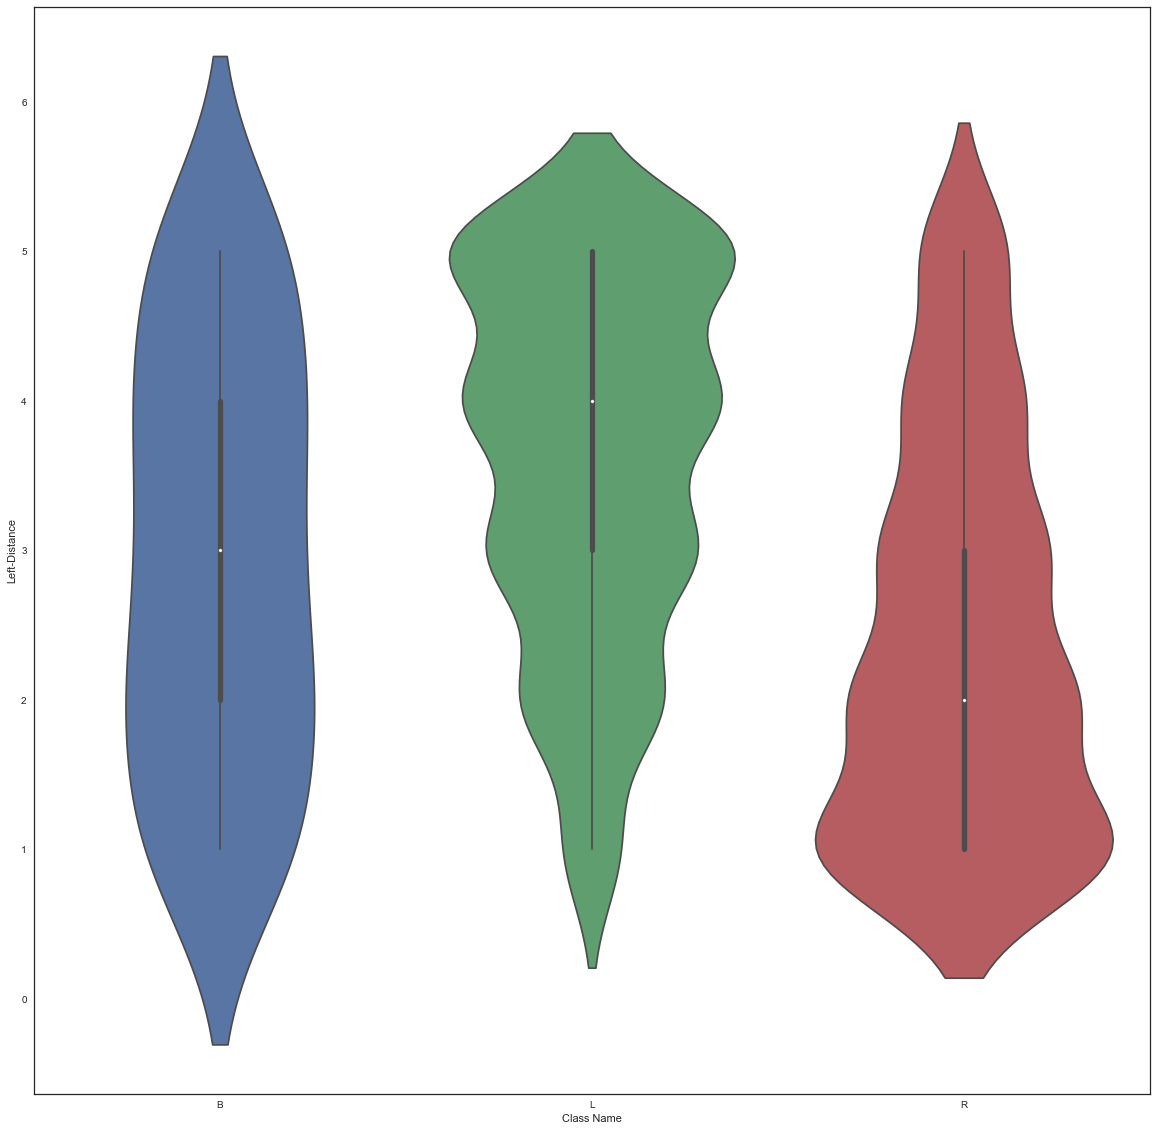

In [256]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Class Name", y="Left-Distance", data=balance_data, size=6)

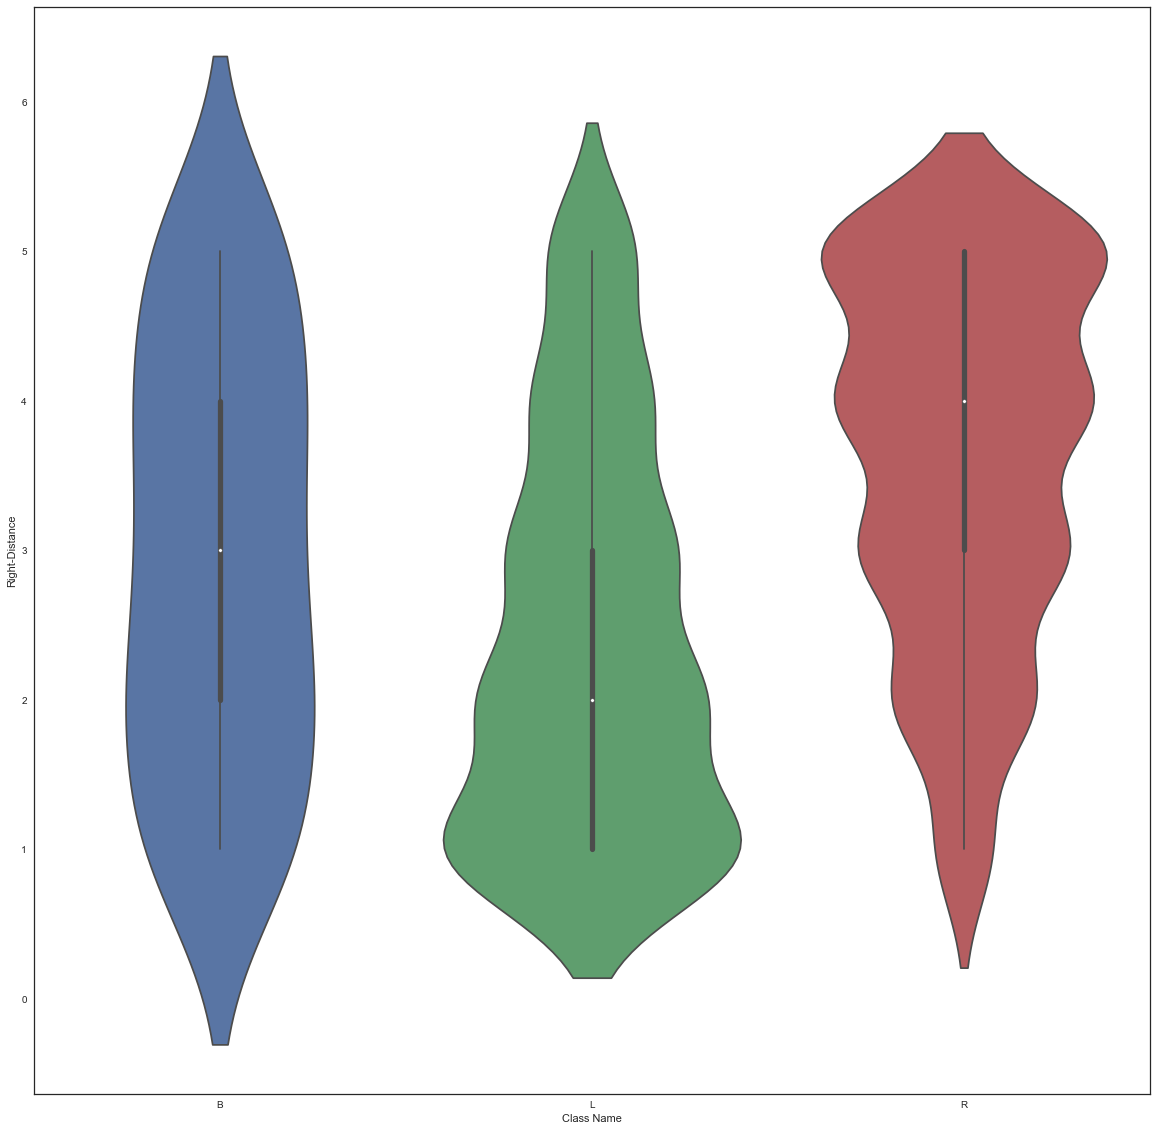

In [257]:
sns.violinplot(x="Class Name", y="Right-Distance", data=balance_data, size=6)

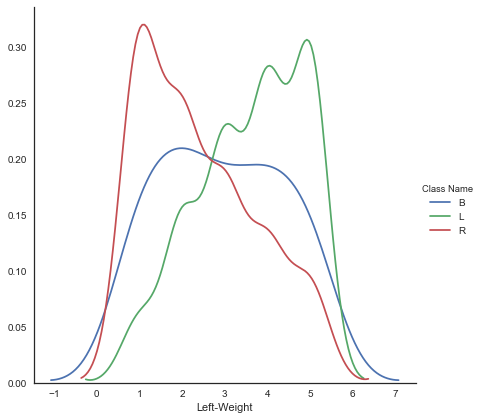

In [258]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(balance_data, hue="Class Name", size=6) \
   .map(sns.kdeplot, "Left-Weight") \
   .add_legend()

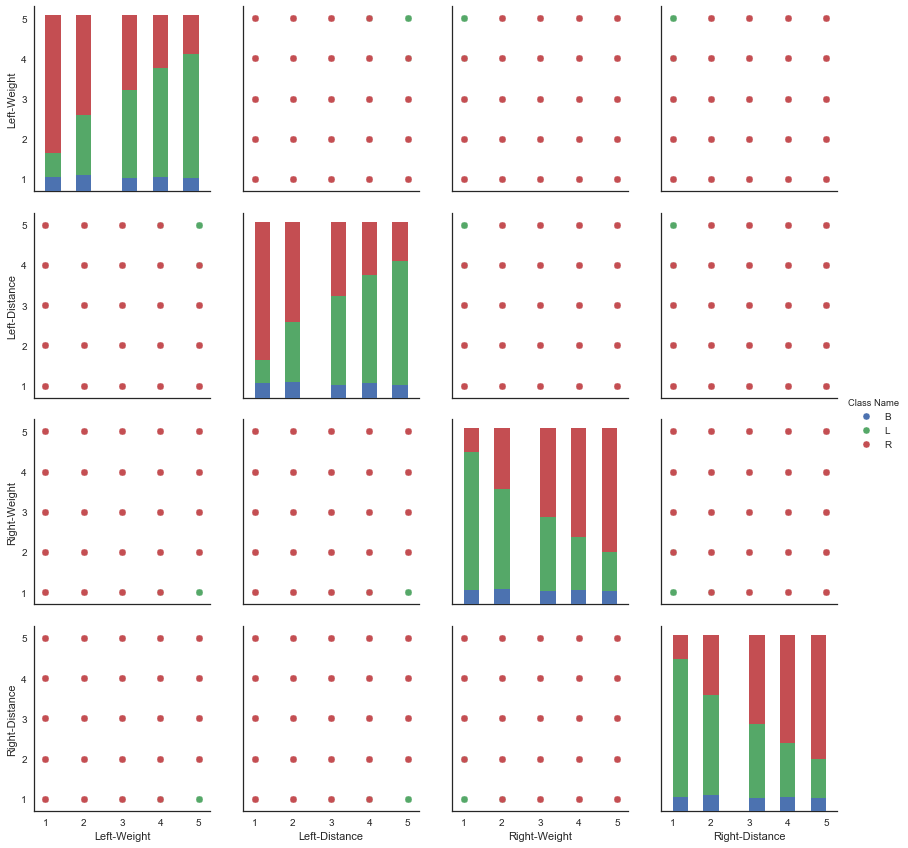

In [259]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(balance_data, hue="Class Name", size=3)

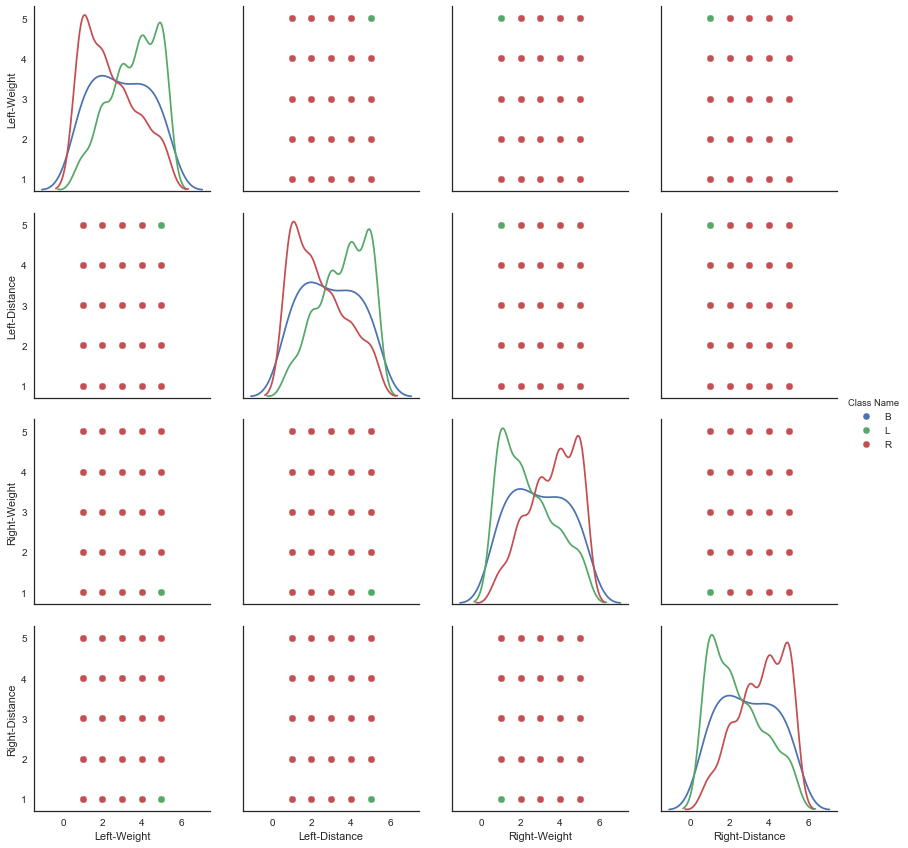

In [260]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(balance_data, hue="Class Name", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022327D0EF98>,
      dtype=object)

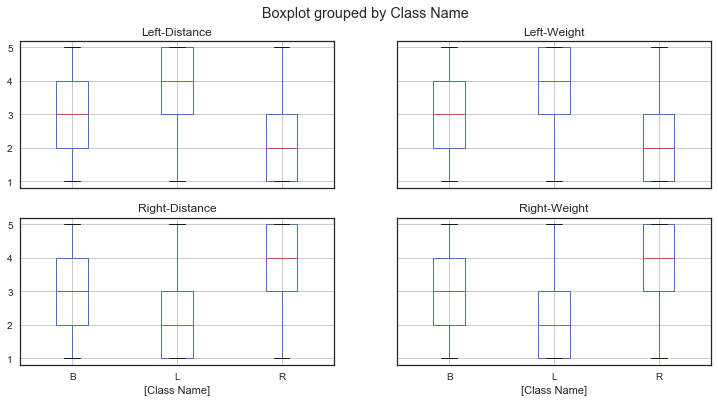

In [261]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
balance_data.boxplot(by="Class Name", figsize=(12, 6))

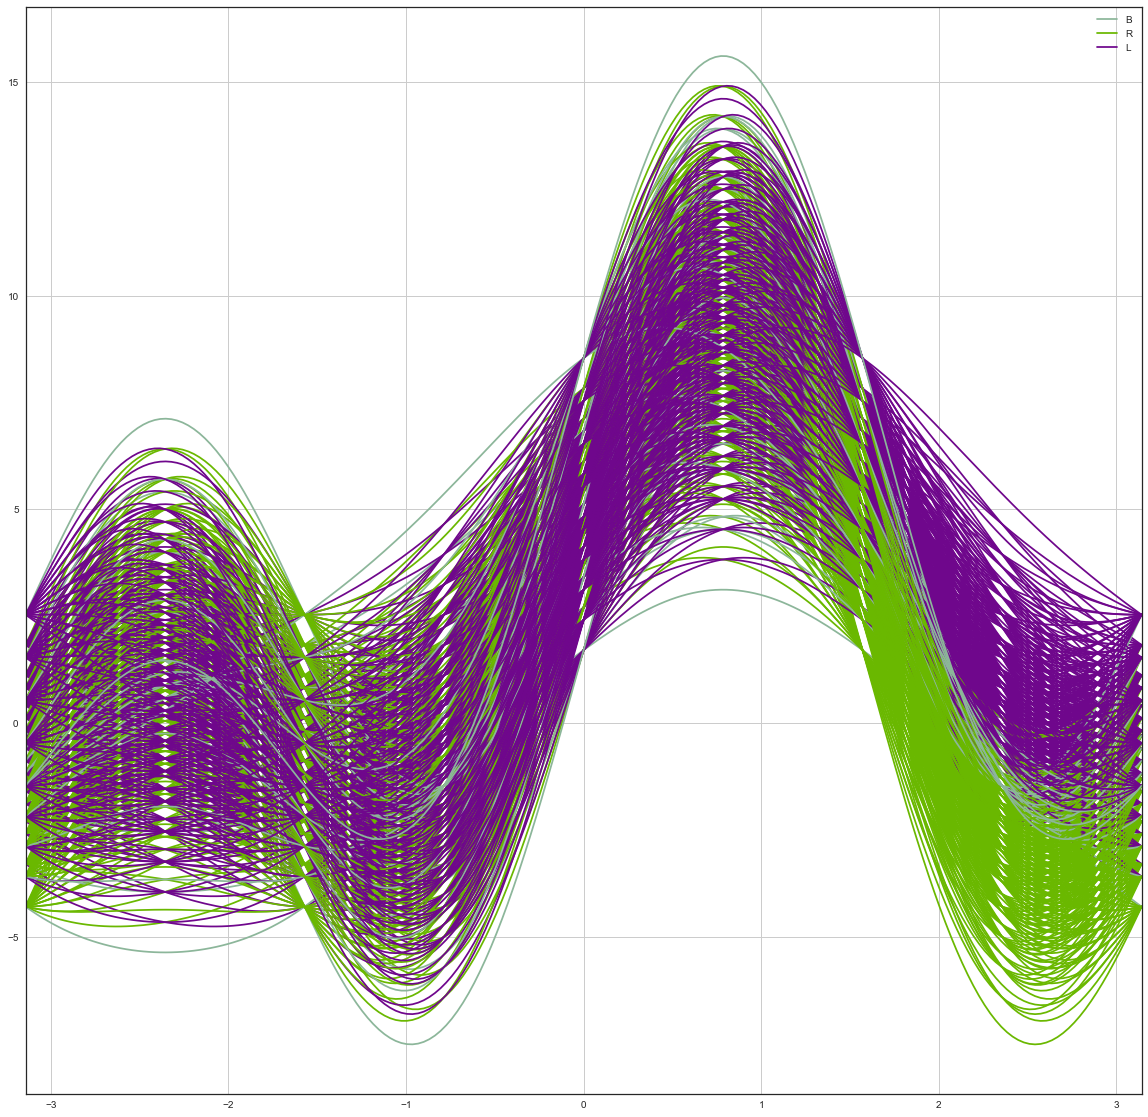

In [262]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(balance_data, "Class Name")

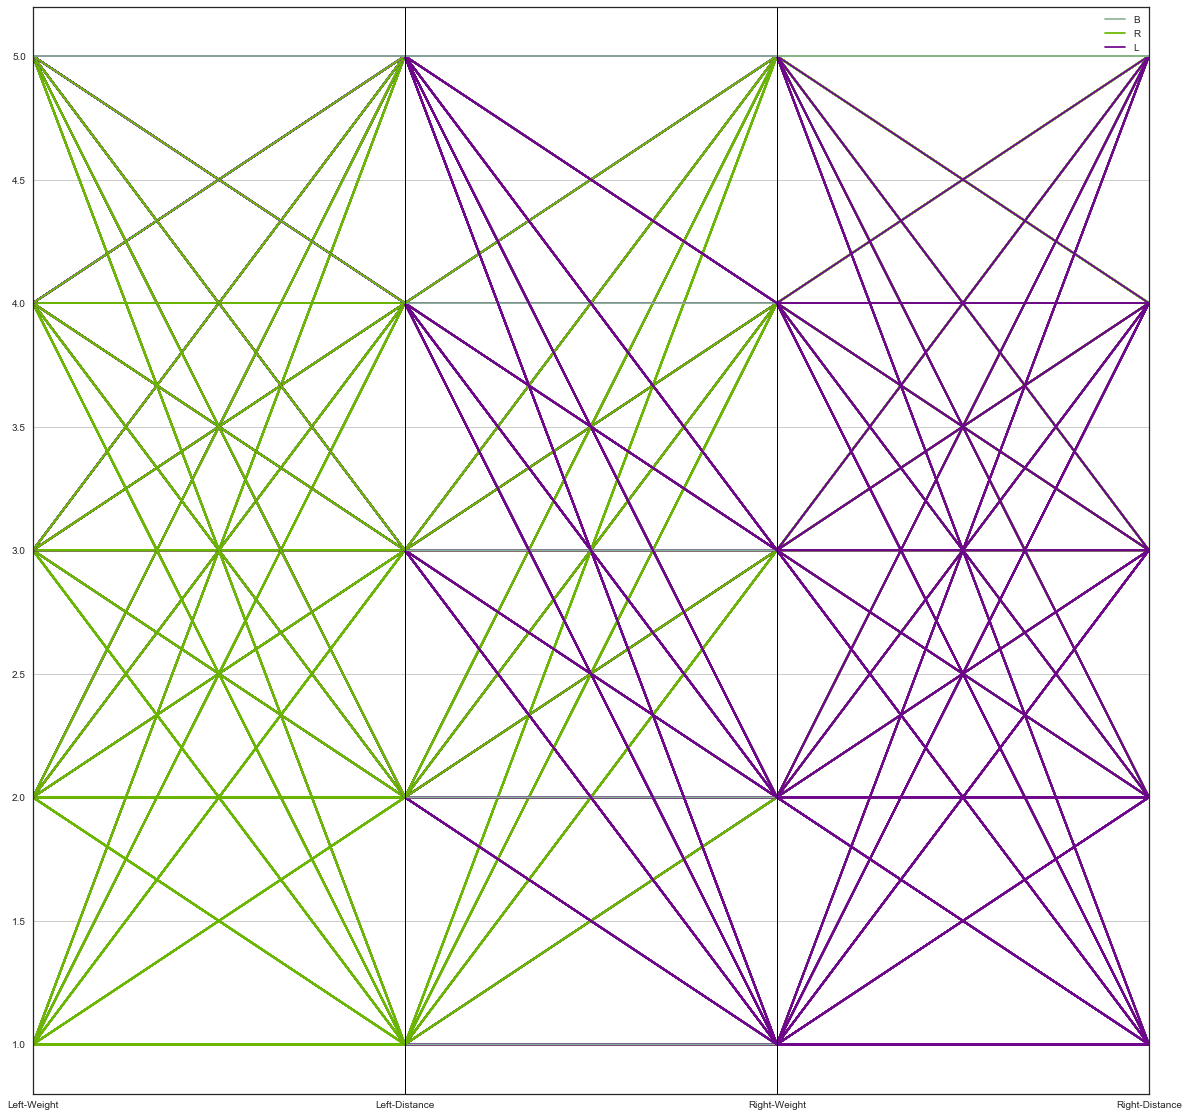

In [263]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(balance_data, "Class Name")

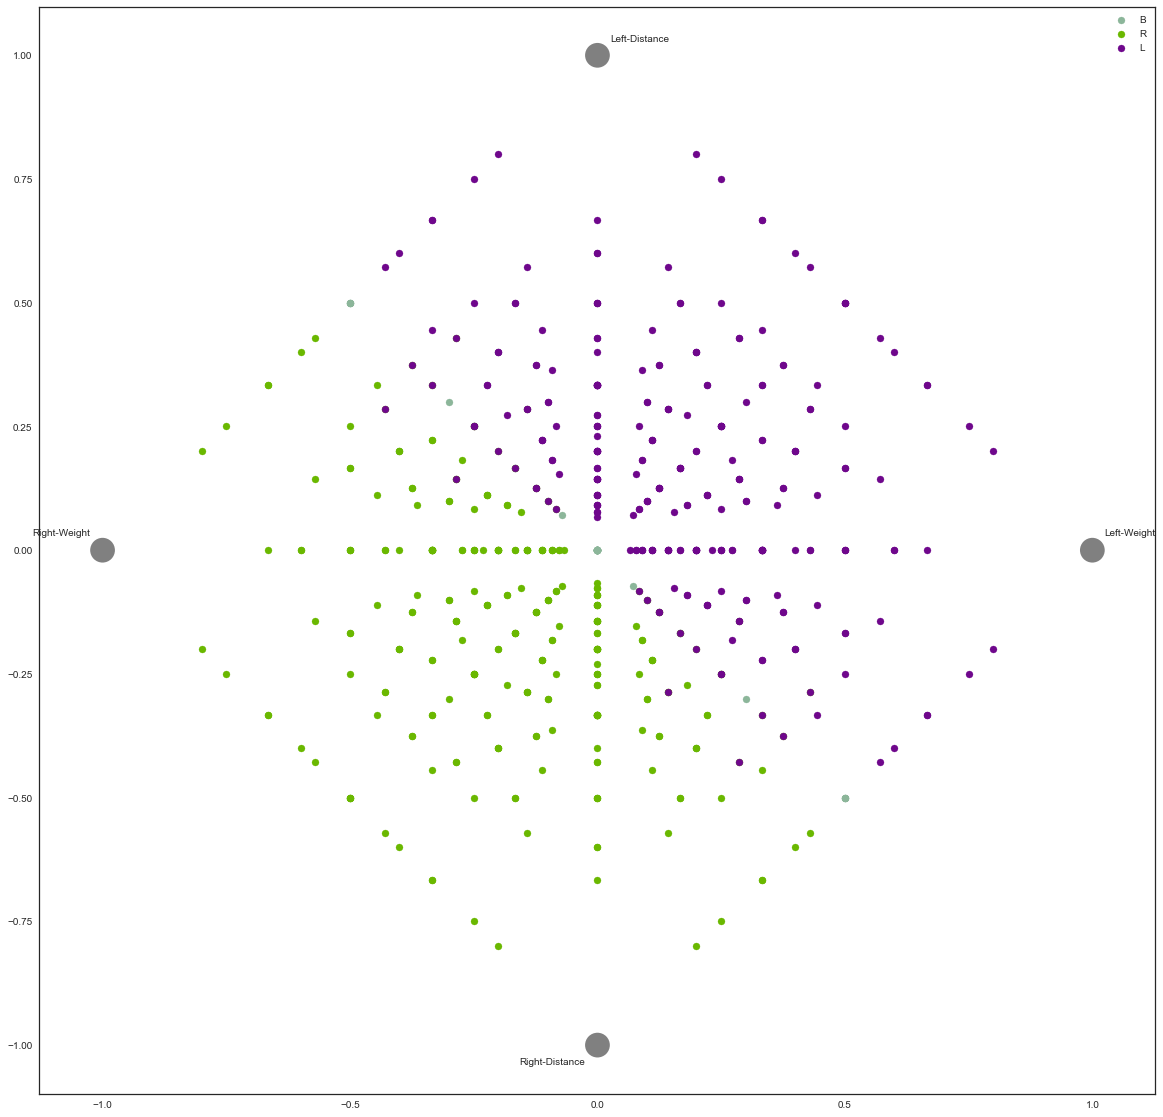

In [264]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(balance_data, "Class Name")

<b> 3. Using scikit-learns DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.

In [265]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [266]:
Y

array(['B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
       'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

In [267]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [268]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf = clf_gini.fit(X_train, y_train)

In [269]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [270]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

In [271]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R

In [272]:
print ("Accuracy for decision tree with gini index as criteria is ", accuracy_score(y_test,y_pred)*100)

Accuracy for decision tree with gini index as criteria is  73.40425531914893


In [273]:
print("Accuracy for decision tree with entropy as criteria is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy for decision tree with entropy as criteria is  70.74468085106383


<b> 4. The link above explains how you can generate a visual output for the tree you just trained.
Use that code snippet to create a visualization of your tree.


In [ ]:
!pip install pydotplus

In [135]:
!pip install graphviz

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [274]:
# Visualize data
import pydotplus
import collections
from sklearn import tree

data_feature_names = ["Left-Weight", "Left-Distance", "Right-Weight", "Right-Distance"]
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_new.png')

True

<img src = "tree_new.png"/>

<b> 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.


In [275]:
clf.predict([[4, 4, 3, 3]])

array(['R'], dtype=object)

> Right-Weight<= 2.5 is FALSE <br>
then Right-Distance <= 2.5 is FALSE<br>
then Left-Weight <= 3.5 is FALSE<br>
so the category for this instance is R

<br> We can see from the color of that node in the graph that it is not predicted properly. The values for L and R are pretty close hence there's a chance of getting ambiguous result.

After changing the parameters (using the default value for max_depth parameter) of Decision Tree Classifier, we noticed a significant change in accuracy.

In [213]:
clf_gini_new = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf = clf_gini_new.fit(X_train, y_train)

In [214]:
clf_entropy_new = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy_new.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [215]:
y_pred_new = clf_gini_new.predict(X_test)
y_pred_new

array(['L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'B', 'L', 'L', 'R',
       'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'B', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'B', 'L', 'R', 'B', 'B',
       'B', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'B', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'B', 'B', 'R', 'L', 'B', 'L',
       'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'R', 'B', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'B', 'L', 'R', 'L', 'R', 'R',
       'B', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'B', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'B', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'B', 'R', 'B', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'B', 'L', 'B', 'R', 'B', 'R', 'L', 'L', 'R', 'R', 'R

In [216]:
y_pred_en_new = clf_entropy_new.predict(X_test)
y_pred_en_new

array(['L', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'B', 'R',
       'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'B', 'B', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'R', 'L', 'B', 'L', 'B', 'L', 'R', 'B', 'B',
       'B', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'L', 'B', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'L', 'B', 'B', 'R', 'L', 'B', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'R', 'B', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'B', 'L', 'L', 'L', 'R', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'B', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'B', 'L',
       'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'L', 'B', 'L', 'R', 'R', 'L', 'R', 'R',
       'L', 'B', 'L', 'B', 'R', 'B', 'R', 'L', 'L', 'R', 'R', 'R

In [217]:
print ("Accuracy for decision tree with gini index as criteria is ", accuracy_score(y_test,y_pred_new)*100)

Accuracy for decision tree with gini index as criteria is  79.7872340425532


In [218]:
print ("Accuracy for decision tree with entropy as criteria is ", accuracy_score(y_test,y_pred_en_new)*100)

Accuracy for decision tree with entropy as criteria is  78.19148936170212


In [158]:
# Visualize data
import pydotplus
import collections
from sklearn import tree

data_feature_names = ["Left-Weight", "Left-Distance", "Right-Weight", "Right-Distance"]
class_name = ["Class Name"]
dot_data = tree.export_graphviz(clf_gini_new,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_new_1.png')

True

<img src = "tree_new_1.png"/>

In [147]:
clf_gini_new.predict([[4, 4, 3, 3]])

array(['L'], dtype=object)

> Right-Weight<=2.5 is FALSE<br>
then Right-Distance <=2.5 is FALSE<br>
then Left-Weight <=3.5 is FALSE<br>
then Left-Distance <=2.5 is FALSE<br>
then Right-Weight <= 3.5 is TRUE<br>
then Left-Distance <= 3.5 s FALSE<br>
So the category for this instance is L.<br>
<br>
We can see that the graph goes deeper in this case and doesn't stop until it gets a non-zero value only for one category for any instance and hence it is more accurate.
This intuition can be backed up by observing the improved accuracy score.

>## Parameter Tuning

In order to tune the hyperparameters, RandomizedSearchCV is used here. Though it doesn't use the entire dataset but only a chunk we can get an idea of best suited hyperparameters and the score so obtained.

In [283]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 6}
Best score is 79.63386727688787
